In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
from astropy.io import ascii
%pylab inline
import matplotlib
import matplotlib.colors as colors
import sklearn
from sklearn.mixture import GMM

Populating the interactive namespace from numpy and matplotlib


In [34]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
sns.set_palette(sns.color_palette(["#9b59b6", 
                                   "#e74c3c", "#3498db", 
                                   "#34495e", "#2ecc71"]))
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [35]:
data = pd.read_csv('../data/galaxy_all.csv', sep= ',') #MJ path
data = data[(data['sm']<10**11.4)&(data['sm']>10**9)&(data['sfr']>0)]
data[:0]

,GalaxyID,GroupID,SnapNum,Redshift,CentreOfMass_x,CentreOfMass_y,CentreOfMass_z,GroupNumber,SubGroupNumber,MassType_Star,...,StellarVelDisp,Vmax,sm,sfr,vel_disp,size,u_nodust,g_nodust,r_nodust,i_nodust


In [36]:
data = data.as_matrix()

In [53]:
u_r = data[:,-3] - data[:,-2]
ms = np.log10(data[:,-8])
galaxy_id = data[:,0]
sfr = np.log10(data[:,-7]) - ms

In [54]:
u_r.max()

0.8191229999999976

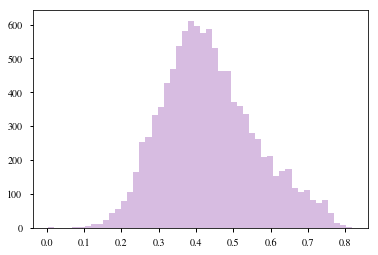

In [55]:
sns.distplot(u_r, norm_hist=False, kde = False)

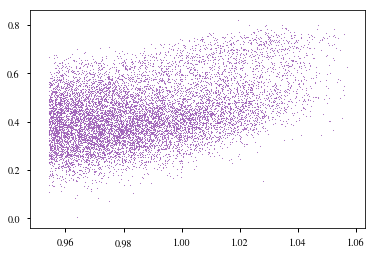

In [56]:
plt.scatter(np.log10(ms), u_r, s= 0.5)

In [69]:
red_id , blue_id = [] , [] 
K = 40
bins = np.linspace(9, 11.4, K)

In [70]:
for k in range(len(bins)-1):
    
    logm_min, logm_max  = bins[k], bins[k+1]
    mask = (ms>logm_min)&(ms<logm_max)
    urm = u_r[mask]
    gid = galaxy_id[mask]
    gmm = GMM(n_components = 2, n_iter=100).fit(urm.reshape(len(urm), 1))
    means_ = gmm.means_
    vars_ = gmm.covars_
    
    mu0, mu1 = means_[0][0], means_[1][0]
    std0, std1 = vars_[0][0]**.5, vars_[1][0]**.5
    
    if mu0>mu1:
        mured, mublue = mu0, mu1
        stdred , stdblue = std0, std1
    else:
        mured, mublue = mu1, mu0
        stdred , stdblue = std1, std0
        
    redmask = urm > mured - 0.5 * stdred
    bluemask = urm < mublue + 0.5 * stdblue
    
    red_id.append(gid[redmask])
    blue_id.append(gid[bluemask])

/software/local/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/software/local/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/software/local/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/software/local/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: Deprecation

/software/local/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/software/local/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/software/local/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/software/local/lib64/python2.7/site-packages/sklearn/utils/depr

/software/local/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/software/local/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/software/local/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/software/local/lib64/python2.7/site-packages/sklearn/utils/depr

/software/local/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/software/local/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/software/local/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/software/local/lib64/python2.7/site-packages/sklearn/utils/depr

/software/local/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/software/local/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/software/local/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/software/local/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning

In [71]:
red_id = np.array(red_id)
blue_id = np.array(blue_id)

In [72]:
red_id = np.concatenate(red_id, axis=0)

In [73]:
blue_id = np.concatenate(blue_id, axis = 0)

In [74]:
print red_id.shape

(4345,)


In [75]:
print blue_id.shape

(5366,)


In [76]:
red_mask = np.where(np.in1d(galaxy_id , red_id) == True)[0]

In [77]:
blue_mask = np.where(np.in1d(galaxy_id , blue_id) == True)[0]

Text(0.5,1,'color split A')

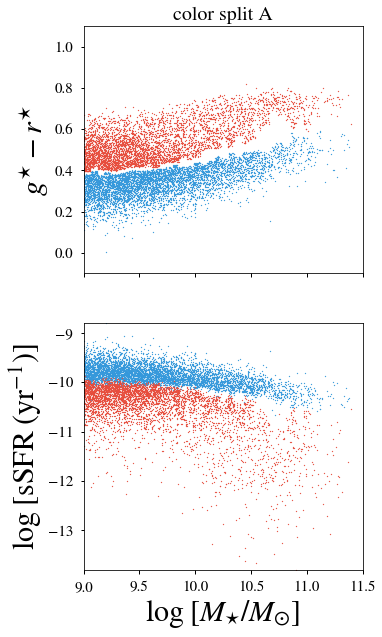

In [78]:
fig , ax = plt.subplots(nrows=2,ncols=1 , figsize=(5,10), sharex=True)
ax[0].scatter(ms[blue_mask], u_r[blue_mask], s= 1 , color = "#3498db")
ax[0].scatter(ms[red_mask], u_r[red_mask], s= 1 , color = "#e74c3c")
ax[1].scatter(ms[blue_mask], sfr[blue_mask], s= 1 , color = "#3498db")
ax[1].scatter(ms[red_mask], sfr[red_mask], s= 1 , color = "#e74c3c")
ax[0].tick_params(axis='both', labelsize=15)
ax[1].tick_params(axis='both', labelsize=15)
ax[0].set_ylabel("$g^{\star} - r^{\star}$", fontsize = 30)
ax[1].set_ylabel("$\log \; [\mathrm{sSFR}\; (\mathrm{yr}^{-1})]$", fontsize = 30)
ax[1].set_xlabel(r"$\log \; [M_{\star}/M_{\odot}]$", fontsize = 30)
ax[1].set_xlim([9,11.5])
ax[1].set_ylim([-13.8, -8.8])
ax[0].set_ylim([-0.1, 1.1])
ax[0].set_title("color split A", fontsize = 20) 